# Sheet desplaying computed batch results with Torben´s recipe

Import packages

In [1]:
import numpy as np
import pandas as pd
import casadi
import  pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, sys

mpl.rcParams["font.size"] = 9
mpl.rcParams["lines.linewidth"] = 3
mpl.rcParams["axes.grid"] = True

from column_variable_init_conds import template_model, template_simulator, update_u

Load results

In [16]:
# Specify batch and simulation
batch = "Batch 7"  # Should be of the format "Batch x" with x = 1,... ,10
sim_num = 0
result_path = "./Data/{}/sim{}".format(batch,sim_num)
print(os.listdir(result_path))

['ts_Batch 7_17900_20000_1.dat', 'us_Batch 7_17900_20000_1.dat', 'xs_Batch 7_17900_20000_1.dat', 'zs_Batch 7_17900_20000_1.dat']


In [19]:
# specify file names manually ==> set aut_pick to False
aut_pick = True
x_file_name = "xs_Batch 1_500_3000.dat"
z_file_name = "zs_Batch 1_500_3000.dat"
u_file_name = "us_Batch 1_500_3000.dat"
t_file_name = "ts_Batch 1_500_3000.dat" 

# pick files of same specification randomly (if aut_pick is set to True)
if aut_pick:
    for file_name in os.listdir(result_path):
        if "xs_{}".format(batch) in file_name:
            specification = file_name[len("xs_{}".format(batch)):]
            break
            
    x_file_name = "xs_{}".format(batch) + specification
    z_file_name = "zs_{}".format(batch) + specification    
    u_file_name = "us_{}".format(batch) + specification
    t_file_name = "ts_{}".format(batch) + specification
    
xs = pickle.load(open(result_path+"/"+x_file_name,"rb"))
zs = pickle.load(open(result_path+"/"+z_file_name,"rb"))
us = pickle.load(open(result_path+"/"+u_file_name,"rb"))
ts = pickle.load(open(result_path+"/"+t_file_name,"rb"))
    

Load Torben´s data

In [39]:
trajectory = pd.read_pickle("./Data/alldata.pck")
ind0 = int(specification[:-4].split("_")[1])
ind_end = int(specification[:-4].split("_")[2])

In [35]:
print(specification[:-4],int(specification[:-4].split("_")[2]),sep="\n")

_17900_20000_1
20000


In [61]:
def compare_plots(var_dict:dict,index=0):
    i = 100
    
    for var_type, variable_names in var_dict.items():
        if var_type.lower() == "z":
            spec = "_z"
            data_dict = zs
            color = "b"
        elif var_type.lower() == "u":
            spec = "_u"
            data_dict = us
            color = "k"
        elif var_type.lower() == "x":
            spec = "_x"
            data_dict = xs
            color = "b"
        
        for var_name in variable_names:
            i +=1
            plt.figure(num=i)
            plt.plot(ts,data_dict[var_name],"{}o-".format(color),label="model")
            plt.plot(ts,trajectory["Flowsheet."+var_name].to_numpy()[ind0:ind_end],"y",label="data")
            plt.legend()
            plt.xlabel("Time in seconds")
            plt.title(var_name)

Display specified results in comparison with Torben´s data

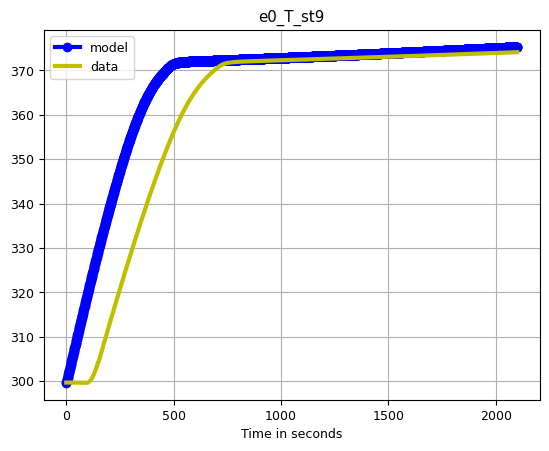

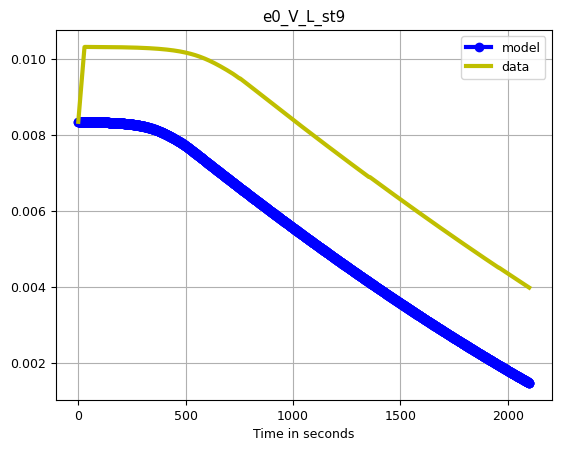

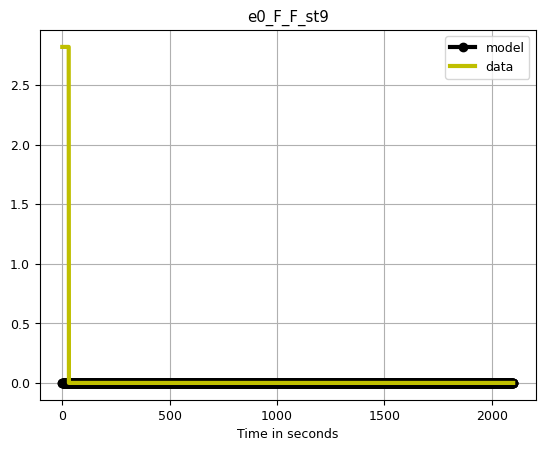

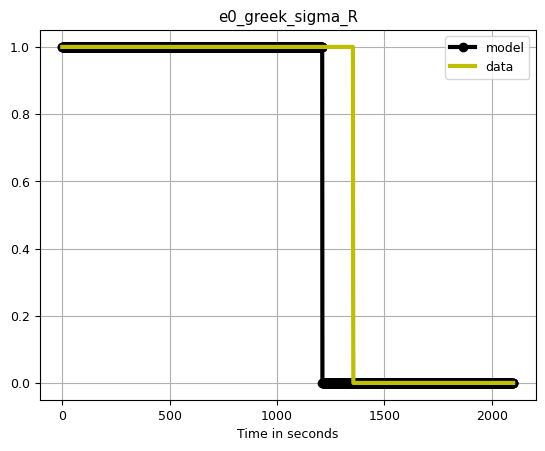

In [62]:
var_dict = {"x":[],"z":["e0_T_st9","e0_V_L_st9"],"u":["e0_F_F_st9","e0_greek_sigma_R"]}
compare_plots(var_dict)